In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

### Train

In [2]:
train = pd.read_csv('../../ml-data/cyberattack_detection/3_selected_features/A1_train_data_PCA.csv', sep=',')

In [3]:
train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.003880,-0.461097,-1.188947,0.018107,0.541958,-0.008505,-0.052736
1,-0.007473,-0.599529,-1.519164,0.029847,-0.639553,-0.429127,0.424075
2,-0.007635,-0.599527,-1.519165,0.029929,-0.639552,-0.429127,0.424074
3,-0.007636,-0.599527,-1.519165,0.029927,-0.639552,-0.429127,0.424074
4,-0.007799,-0.599524,-1.519165,0.030010,-0.639552,-0.429127,0.424073


In [4]:
# set isolation = 0.01
isolation_forest = IsolationForest(contamination=0.01)

In [5]:
isolation_forest.fit(train)

IsolationForest(contamination=0.01)

### Test

In [6]:
test = pd.read_csv('../../ml-data/cyberattack_detection/3_selected_features/A1_test_data_PCA.csv', sep=',')

In [7]:
test.shape

(1053845, 7)

In [8]:
test_predict = isolation_forest.predict(test)

In [9]:
test['anomaly'] = test_predict

In [10]:
test['anomaly'].value_counts()

 1    1050969
-1       2876
Name: anomaly, dtype: int64

In [11]:
test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,anomaly
0,0.131097,5.228975,-2.591024,0.049764,0.787744,0.050563,-0.029777,-1
1,0.116630,4.604554,-2.437158,0.046376,0.760771,0.044081,-0.032296,-1
2,0.122011,4.796523,-2.484465,0.046861,0.769061,0.046073,-0.031514,-1
3,0.128372,5.011403,-2.537411,0.047548,0.778339,0.048303,-0.030641,-1
4,0.119795,4.741545,-2.470918,0.046890,0.766688,0.045503,-0.031743,-1


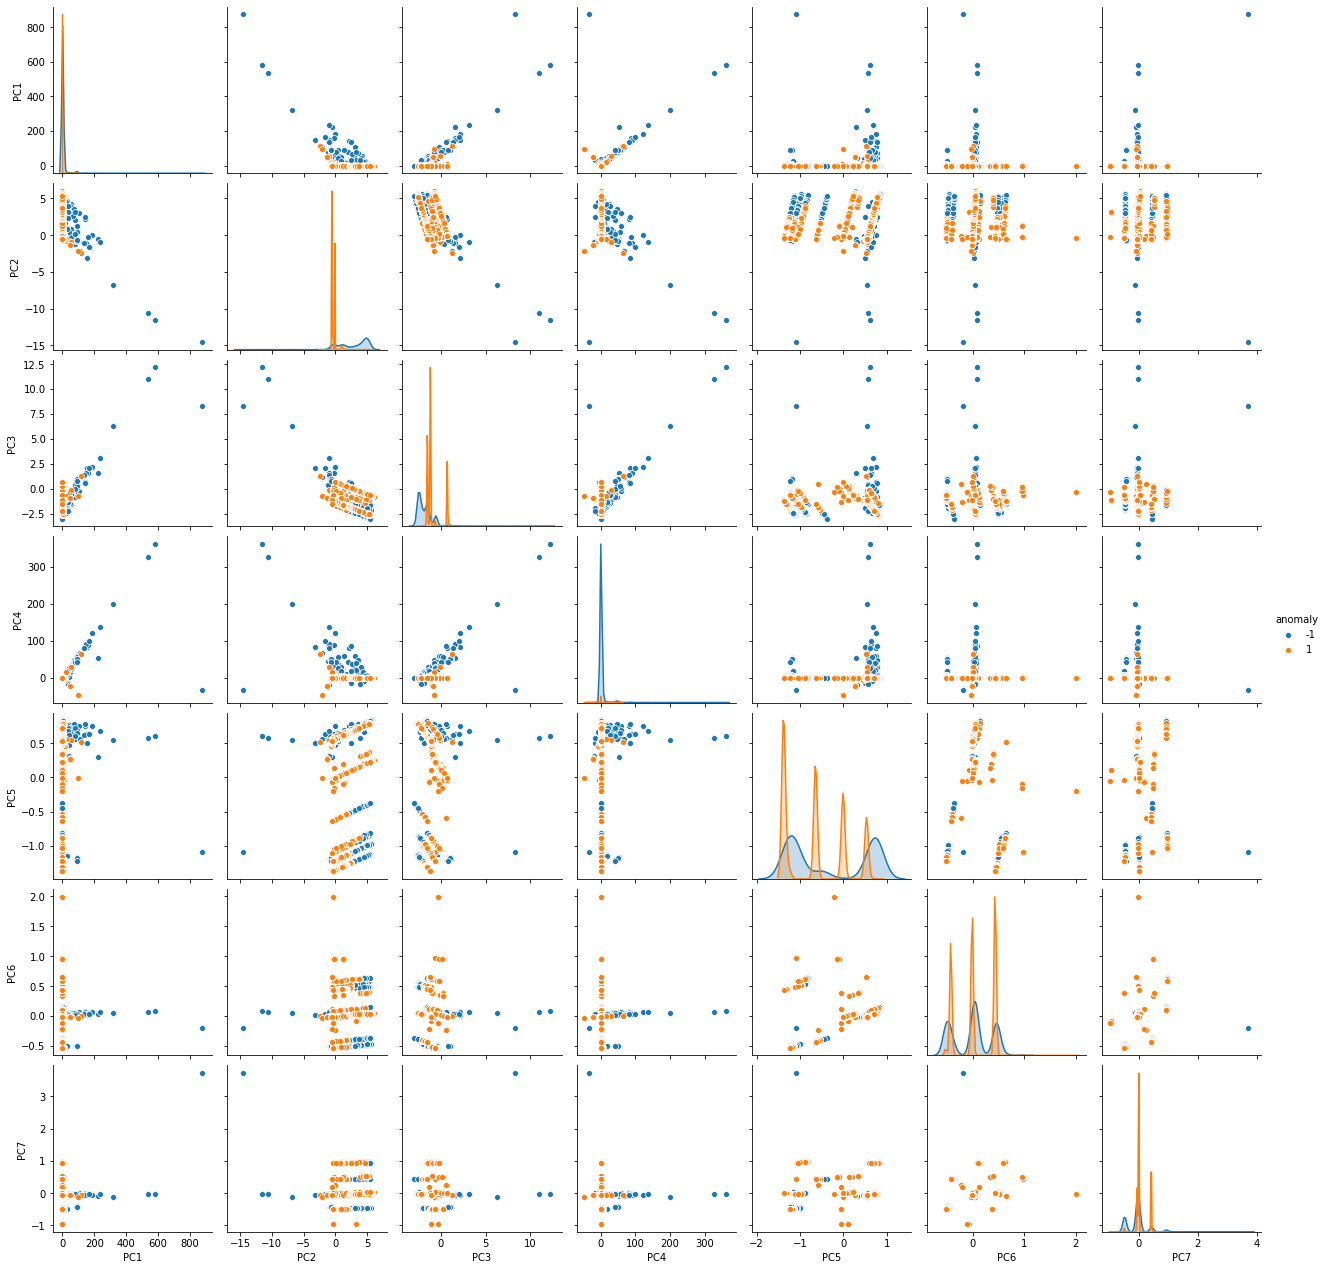

In [27]:
sns.pairplot(test, hue = 'anomaly')

In [12]:
anomalies = test.loc[test['anomaly'] == -1]

In [22]:
anomalies.head(40)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,anomaly
0,0.131097,5.228975,-2.591024,0.049764,0.787744,0.050563,-0.029777,-1
1,0.116630,4.604554,-2.437158,0.046376,0.760771,0.044081,-0.032296,-1
2,0.122011,4.796523,-2.484465,0.046861,0.769061,0.046073,-0.031514,-1
3,0.128372,5.011403,-2.537411,0.047548,0.778339,0.048303,-0.030641,-1
4,0.119795,4.741545,-2.470918,0.046890,0.766688,0.045503,-0.031743,-1
5,0.126458,5.056452,-2.548513,0.049036,0.780293,0.048772,-0.030476,-1
6,0.119730,4.547496,-2.423103,0.043827,0.758294,0.043487,-0.032496,-1
7,0.124879,4.716253,-2.464677,0.044800,0.765584,0.045239,-0.031807,-1
8,0.128025,5.116969,-2.563426,0.049274,0.782906,0.049400,-0.030233,-1
9,0.130568,5.166657,-2.575671,0.048835,0.785049,0.049915,-0.030022,-1


In [18]:
original_test = pd.read_csv('../../ml-data/cyberattack_detection/1_raw_data/A2_1/clean_test_data', sep=',')

In [20]:
anomalies_orig_feat = original_test[original_test.index.isin(anomalies.index)]

In [23]:
anomalies_orig_feat.head(40)

,Timestamp,Duration,Protocol,SrcIPAddress,SrcPort,Direction,DestIPAddress,DestPort,State,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes
0,2012/12/01 03:36:40.878146,3709.429059,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,84,6191,3951
1,2012/12/01 03:51:49.918983,3309.740162,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,77,6082,3959
2,2012/12/01 04:07:21.899558,3432.626766,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,85,6225,3813
3,2012/12/01 04:38:46.872983,3570.183838,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,94,7579,4131
4,2012/12/01 04:53:55.866280,3397.426792,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,79,6182,3610
5,2012/12/01 05:09:27.940956,3598.991256,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,79,5591,3783
6,2012/12/01 05:40:06.888603,3273.257968,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,102,7612,3887
7,2012/12/01 05:56:01.872795,3381.290483,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,110,7415,4876
8,2012/12/01 06:11:33.889560,3637.730230,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,80,6293,3779
9,2012/12/01 06:40:17.891590,3669.547336,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,89,6434,3746


In [26]:
anomalies_orig_feat.to_csv('../4 Results/A1_test_iForest_PCA_orig_feat.csv', sep=',')

End